In [1]:
from tracr.rasp import rasp
from tracr.compiler import compiling
from tracr.compiler import lib

import sys
import os

from src.functions import *

In [2]:
# name = "reverse"
# max_length = 10
name = "sort"
max_length = 5
N = 5000

In [3]:
model = generateModel(name, max_length)
print(model.model.model_config)
print(model.model.input_encoder.encoding_map)
print(model.model.output_encoder.encoding_map)

2024-09-02 13:44:38.301124: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


TransformerConfig(num_heads=1, num_layers=3, key_size=32, mlp_hidden_size=30, dropout_rate=0.0, activation_function=<jax._src.custom_derivatives.custom_jvp object at 0x150830f52150>, layer_norm=False, causal=False)
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 'BOS': 6, 'compiler_pad': 7}
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}


In [4]:
print(model.model.params["token_embed"]["embeddings"])
print("-------")
print(model.model.params["transformer/layer_0/mlp/linear_1"])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [4]:
model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 1, 2, 3, 4, 5]

In [5]:
X, Y = generateAndEncodeData(name, max_length, N, removeDuplicates=True)
split = int(X.shape[0] * 0.85)
X_train, X_val = X[:split], X[split:]
Y_train, Y_val = Y[:split], Y[split:]

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

print(X_train[0])
print(X_val[0])
print(Y_train[0])
print(Y_val[0])

(1882, 6)
(333, 6)
(1882, 6)
(333, 6)
[6 2 1 4 2 7]
[6 5 4 5 4 3]
[0 1 2 2 4 0]
[0 3 4 4 5 5]


In [6]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(1., dtype=float64)

In [7]:
model.addNoise("gaussian", 1.0, 0.1)

In [8]:
print(model.model.params["token_embed"]["embeddings"])
print("-------")
print(model.model.params["transformer/layer_0/mlp/linear_1"])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [9]:
model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 4, 4, 2, 1, 1]

In [10]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(0.00690755, dtype=float64)

100%|██████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00, 10.00it/s]


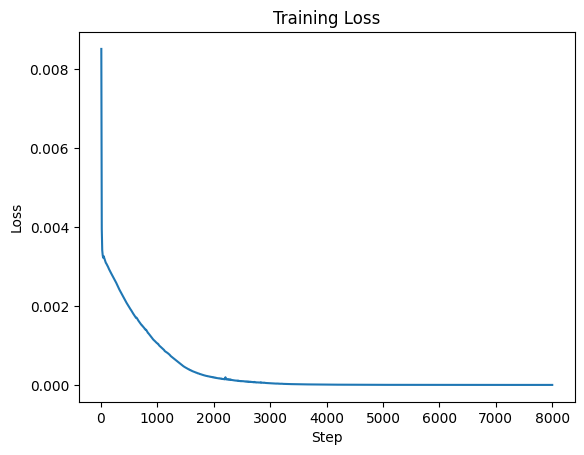

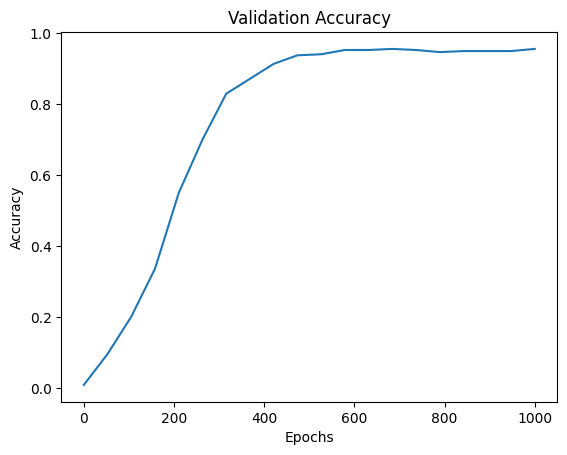

In [11]:
_ = model.train(X_train, Y_train, n_epochs=1000, batch_size=256, lr=1e-4, plot=True, X_val=X_val, Y_val=Y_val, valStep=50)

In [12]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(1., dtype=float64)

In [14]:
model.fastEvaluateEncoded(X_val, Y_val)

Array(0.95495495, dtype=float64)

In [15]:
model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 1, 2, 3, 4, 5]

In [16]:
buggy_model = generateBuggyModel(name, max_length)

In [17]:
print(buggy_model.model.params["token_embed"]["embeddings"])
print("-------")
print(buggy_model.model.params["transformer/layer_0/mlp/linear_1"])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [18]:
buggy_model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 5, 4, 3, 2, 1]

In [19]:
buggy_model.fastEvaluateEncoded(X_train, Y_train)

Array(0.00690755, dtype=float64)

In [24]:
_ = buggy_model.train(X_train, Y_train, n_epochs=50000, batch_size=256, lr=1e-4, plot=True, X_val=X_val, Y_val=Y_val, valStep=50)

  3%|█▋                                                             | 1344/50000 [02:07<1:17:05, 10.52it/s]


KeyboardInterrupt: 

In [21]:
buggy_model.apply(["BOS", 3, 2, 5, 1, 4])

['BOS', 1, 2, 3, 4, 6]

In [22]:
buggy_model.fastEvaluateEncoded(X_train, Y_train)

Array(0.42561105, dtype=float64)

In [23]:
buggy_model.fastEvaluateEncoded(X_val, Y_val)

Array(0.34834835, dtype=float64)

In [25]:
model.setRandomWeights()

In [26]:
print(buggy_model.model.params["token_embed"]["embeddings"])
print("-------")
print(buggy_model.model.params["transformer/layer_0/mlp/linear_1"])

[[ 7.44233133e-02  1.19179456e-01  3.91548230e-02  7.20452745e-02
   9.84131692e-02  8.45422535e-01  3.39673398e-02  5.06090018e-02
   4.39220431e-02  4.20311819e-02  3.11566205e-02 -7.20091163e-04
   1.93463445e-02  1.93835253e-02 -1.27797786e-02 -5.91361714e-03
  -2.09963269e-02 -5.23910763e-02 -9.61424073e-02  2.91673596e-02
   3.54682627e-02 -1.23062687e-01 -1.18051312e-01 -1.56224876e-01
  -8.57479761e-02 -3.21423258e-02 -1.19947637e-01 -1.08196029e-01
  -8.93325981e-02 -6.26522359e-02  8.68264315e-02 -1.05519145e-01
  -1.30337721e-01 -9.00881608e-02 -1.06482689e-01  1.56332468e-01
   4.42188005e-01 -2.26297084e-01 -1.32802988e-01 -1.77533249e-01
  -1.92717513e-01 -1.65400273e-01  4.87502130e-02  2.71812026e-02
  -1.82250207e-02 -3.58384180e-02 -4.27623780e-02 -4.37258863e-02
  -1.85879305e-02  1.17518470e+00  1.46194122e-01 -4.69434803e-02
  -4.78406823e-02 -1.61393149e-02 -5.53796033e-02 -2.21476150e-02
   2.83227809e-01]
 [ 4.07701342e-02  1.83333068e-02  3.38124492e-02  2.4651

In [28]:
model.fastEvaluateEncoded(X_train, Y_train)

Array(0.0010627, dtype=float64)

100%|██████████████████████████████████████████████████████████████████| 1000/1000 [01:33<00:00, 10.71it/s]


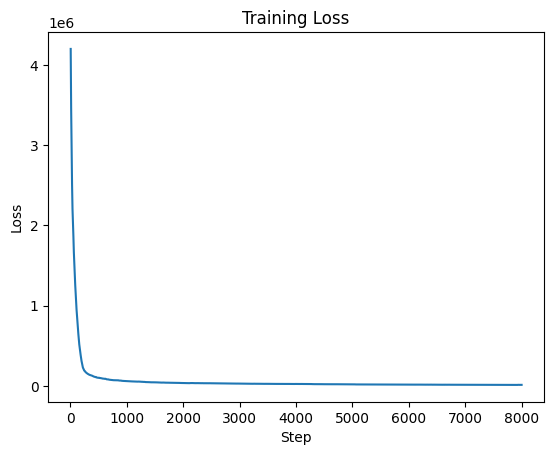

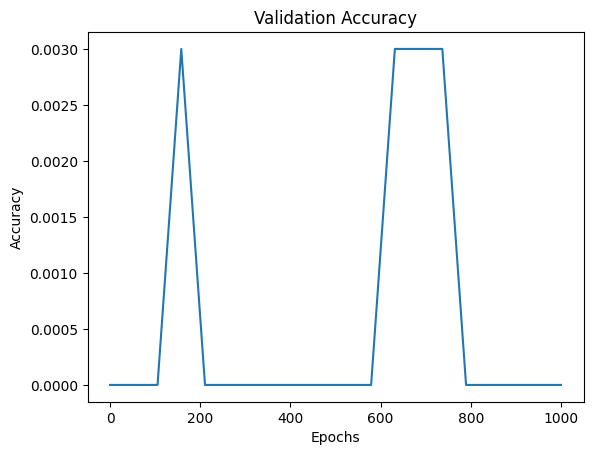

In [29]:
_ = model.train(X_train, Y_train, n_epochs=1000, batch_size=256, lr=1e-4, plot=True, X_val=X_val, Y_val=Y_val, valStep=50)

In [30]:
model.fastEvaluateEncoded(X_val, Y_val)

Array(0.003003, dtype=float64)